# Unsupervised Learning: Clustering

In classification (supervised), we try to find boundaries/rules to separate points according to pre-determined labels.

In clustering, the algorithm chooses the labels.  Goal is to choose labels so that similar rows get labeled the same.

Today: K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=3)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


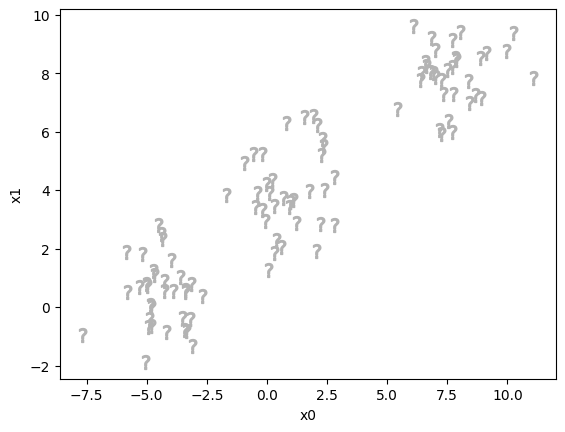

In [3]:
# x0 => x-axis
# x1 => y-axis
# cluster => marker type
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

ax = km_scatter(df, s=100, c="0.7")

# Hard Problem

Finding the best answer.

# Easier Problem

Taking a bad answer and make it a little better.  Then repeat!

<AxesSubplot:xlabel='x0', ylabel='x1'>

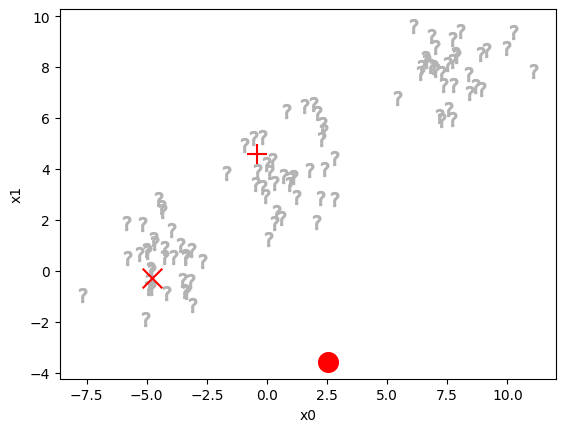

In [54]:
clusters = np.random.uniform(-5, 5, size=(3,2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]

ax = km_scatter(df, s=100, c="0.7")
km_scatter(clusters, s=200, c="red", ax=ax)

In [55]:
clusters

,x0,x1,label
0,2.536497,-3.574603,o
1,-0.411186,4.568736,+
2,-4.786241,-0.273935,x


In [56]:
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


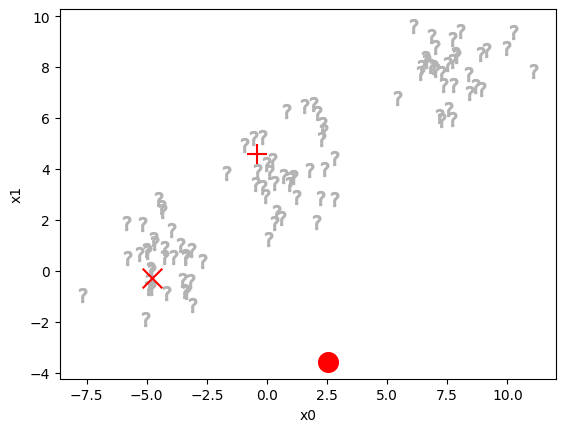

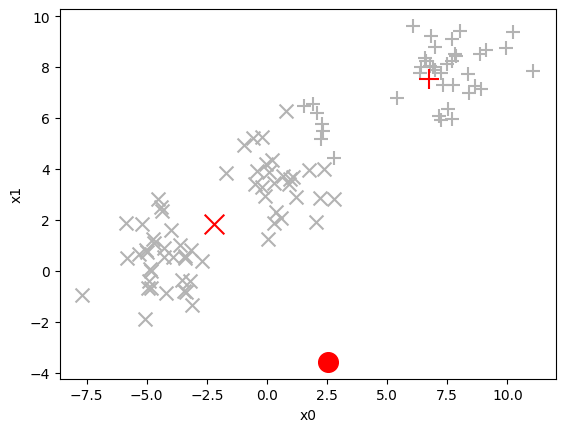

In [57]:
class KM:
    def __init__(self, df, clusters):
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = clusters["label"].values
        
    def plot(self):
        ax = km_scatter(self.df, color="0.7", s=100)
        km_scatter(self.clusters, ax=ax, color="red", s=200)
        
    def assign_points(self):
        for center in self.clusters.itertuples():
            x0_diff = df["x0"] - center.x0
            x1_diff = df["x1"] - center.x1
            distances = (x0_diff ** 2 + x1_diff ** 2) ** 0.5
            self.df[center.label] = distances
        self.df["label"] = self.labels[self.df[self.labels].values.argmin(axis=1)] # get label of nearest centroid
    
    def update_centers(self):
        for center in self.clusters.itertuples():
            subset_df = self.df[self.df["label"] == center.label]
            if len(subset_df) > 0:
                x0 = subset_df["x0"].mean()
                x1 = subset_df["x1"].mean()
                self.clusters.at[center.Index, "x0"] = x0
                self.clusters.at[center.Index, "x1"] = x1

km = KM(df, clusters)
km.plot()

for i in range(10):
    km.assign_points()
    km.update_centers()
    
km.plot()

In [61]:
km.df

,x0,x1,o,+,x,label
0,8.370099,7.747045,12.736194,1.653159,12.108402,+
1,-2.701740,0.395336,6.572636,11.832760,1.520487,x
2,-3.204128,-0.407438,6.556349,12.722431,2.453643,x
3,-3.132762,-1.335692,6.095345,13.268961,3.300503,x
4,7.152737,6.069995,10.692424,1.530520,10.263386,+
...,...,...,...,...,...,...
95,-4.681343,1.086141,8.591842,13.110277,2.596555,x
96,-3.410109,0.515456,7.217390,12.335957,1.790109,x
97,0.683092,3.737246,7.543092,7.143610,3.452070,x
98,7.744654,7.293236,12.051341,1.044605,11.341301,+


In [52]:
km.clusters

,x0,x1,label
0,-4.413473,0.434103,o
1,7.697512,7.924113,+
2,0.859856,3.985564,x


In [27]:
km.labels

array(['o', '+', 'x'], dtype=object)

# KMeans in sklearn

In [58]:
from sklearn.cluster import KMeans

In [60]:
# km => our custom version
# km2 => from sklearn
km2 = KMeans(3)
km2

KMeans()

In [6]:
# 1. fit: find good centroids

In [7]:
# 2. transform: give me the distances from each point to each centroid

In [8]:
# 3. predict: give me the chosen group labels
# strange name: because there is no correct answer to predict

# How many clusters?

# KMeans as Preprocessing

Sometimes we'll use an unsupervised learning technique (like k-means) to pre-process data, creating better inputs for a supervised learning technique (like logistic regression)

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [10]:
def make_data():
    x, y = datasets.make_blobs(n_samples=250, centers=5, random_state=5)
    xcols = ["x0", "x1"]
    df1 = pd.DataFrame(x, columns=xcols)
    df1["y"] = y > 0

    df2 = pd.DataFrame(np.random.uniform(-10, 10, size=(250, 2)), columns=["x0", "x1"])
    df2["y"] = False

    return pd.concat((df1, df2))

train, test = train_test_split(make_data())

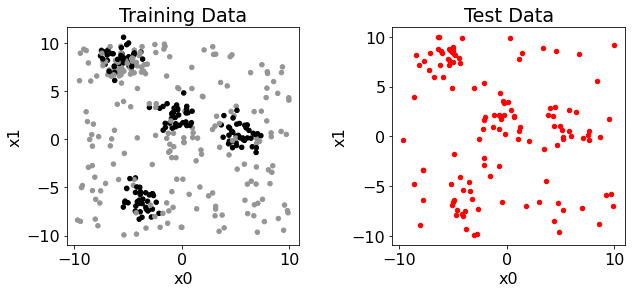

In [11]:
plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
train.plot.scatter(x="x0", y="x1", c=train["y"], vmin=-1, ax=ax[0])
test.plot.scatter(x="x0", y="x1", c="red", ax=ax[1])
ax[0].set_title("Training Data")
ax[1].set_title("Test Data")
plt.subplots_adjust(wspace=0.4)

# StandardScaler with KMeans

<AxesSubplot:xlabel='0', ylabel='1'>

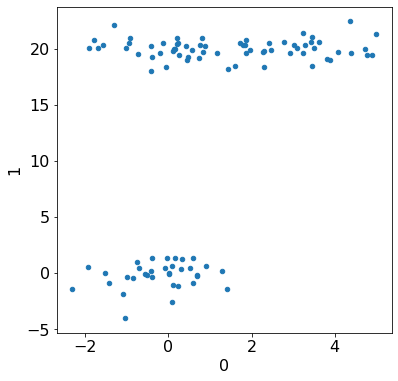

In [12]:
x = datasets.make_blobs(centers=np.array([(0,0), (0,20), (3,20)]))[0]
df = pd.DataFrame(x)
df.plot.scatter(x=0, y=1, figsize=(6,6))